# Problem Description

Data Dictionary
* CETEL_NUMBER : Customer phone number
* CNI_CUSTOMER : Customer ID
* DAYS_LIFE : Days the customer is with the company
* DEVICE_TECHNOLOGY : (1 = AWS , 2 = No AWS, 3 = 3G Only, 4 = 4G Only, 5 = no classification) phone device technology
* MIN_PLAN : Minutes included in contract
* PRICE_PLAN : Price of the plan
* TOT_MIN_CALL_OUT : Count of minutes call out
* AVG_MIN_CALL_OUT_3: Avg minutes call out last 3 months
* ROA_LASTMONTH : Data usage on other companies' networks
* DEVICE: ( 1 Sony, 2 Motorola, 3 Huawei, 4 Apple, 5 LG, 6 Nokia, 7 Samsung, 8 Alcatel, 9 Verykool, 10 Lenovo, 11 Mobiwire, 12 ZTE, 13 Sony Ericsson, 14 BlackBerry, 15 VSN Mobil, 16 VSN, 17 T610, 18 Other)
* TEC_ANT_DATA: Technology of the data antenna
* TEC_ANT_VOICE: Technology of the voice antenna
* STATE/CITY: Technology of the antenna in state and city (State 1,2...100), (City 1,2,3,....320)
* CHURN: 0 = Churned, 1 = Has not yet churned

Source: https://www.kaggle.com/raumonsa11/churn-telco-europa-spa-eng

Based on the information given in the data dictionary, we have maximum and minimum values for different features that we can check when cleaning the dataset. The range for DEVICE_TECNOLOGY should be 1-5. For DAYS_LIFE, we should see a positive number that the customer was with the company. DEVICE should be a number between 1 and 18 (inclusive). For STATE, we should see 1-100, and for CITY, we should see 1-320. Any values that fall outside of these bounds will be closely analyzed in order to determine if the observation should be dropped or if other allowances can be made. We can build a good model, but if we build it off of bad data, it will not be as accurate as possible.

---

# Part 1: Cleaning the Data

In this section, we will look at nulls and any values outside the given bounds for 7 of our features.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
from scipy.stats import ttest_ind, percentileofscore
from time import sleep
from tqdm import tqdm

In [2]:
# Read in the csv file containing the training data
imported_df = pd.read_csv('data/train_churn_kg.csv', header=0)

imported_df.head()

,CETEL_NUMBER,CNI_CUSTOMER,DAYS_LIFE,DEVICE_TECNOLOGY,MIN_PLAN,PRICE_PLAN,TOT_MIN_CALL_OUT,AVG_MIN_CALL_OUT_3,TOT_MIN_IN_ULT_MES,AVG_MIN_IN_3,ROA_LASTMONTH,ROACETEL_LAST_MONTH,DEVICE,TEC_ANT_DATA,STATE_DATA,CITY_DATA,TEC_ANT_VOICE,STATE_VOICE,CITY_VOICE,CHURN
0,56991715723,761130129,455,1,200,8395,0,0,0,2,0,0,7,2.5,10.0,93.0,2.5,10.0,93.0,0
1,56936225196,155259159,180,2,2500,13437,4,145,32,336,1,0,13,3.0,6.0,38.0,3.0,6.0,38.0,0
2,56989789214,143481697,480,1,2500,16798,0,20,4,2,0,0,3,3.0,5.0,313.0,3.0,4.0,342.0,0
3,56990739868,72526880,173,2,2500,16798,197,630,34,6,1,17,13,4.0,100.0,268.0,4.0,100.0,268.0,0
4,56993149265,160008989,317,1,2500,25202,109,66,95,0,0,1,7,4.0,5.0,156.0,4.0,5.0,156.0,0


In [3]:
# Correct the spelling error in the column name
imported_df.rename(columns={'DEVICE_TECNOLOGY': 'DEVICE_TECHNOLOGY'}, inplace=True)

In [4]:
imported_df.shape

(190776, 20)

In [5]:
imported_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190776 entries, 0 to 190775
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CETEL_NUMBER         190776 non-null  int64  
 1   CNI_CUSTOMER         190776 non-null  object 
 2   DAYS_LIFE            190776 non-null  int64  
 3   DEVICE_TECHNOLOGY    190776 non-null  int64  
 4   MIN_PLAN             190776 non-null  int64  
 5   PRICE_PLAN           190776 non-null  int64  
 6   TOT_MIN_CALL_OUT     190776 non-null  int64  
 7   AVG_MIN_CALL_OUT_3   190776 non-null  int64  
 8   TOT_MIN_IN_ULT_MES   190776 non-null  int64  
 9   AVG_MIN_IN_3         190776 non-null  int64  
 10  ROA_LASTMONTH        190776 non-null  int64  
 11  ROACETEL_LAST_MONTH  190776 non-null  int64  
 12  DEVICE               190776 non-null  int64  
 13  TEC_ANT_DATA         190776 non-null  float64
 14  STATE_DATA           185155 non-null  float64
 15  CITY_DATA        

In [6]:
# Check for null values
imported_df.isnull().sum().sort_values(ascending=True)

CETEL_NUMBER              0
TEC_ANT_VOICE             0
TEC_ANT_DATA              0
DEVICE                    0
ROACETEL_LAST_MONTH       0
ROA_LASTMONTH             0
TOT_MIN_IN_ULT_MES        0
AVG_MIN_IN_3              0
TOT_MIN_CALL_OUT          0
PRICE_PLAN                0
MIN_PLAN                  0
DEVICE_TECHNOLOGY         0
DAYS_LIFE                 0
CNI_CUSTOMER              0
AVG_MIN_CALL_OUT_3        0
CHURN                     0
CITY_VOICE             5621
STATE_DATA             5621
CITY_DATA              5621
STATE_VOICE            5621
dtype: int64

We can use the code in the cell below to quickly look at the maximum and minimum values for each feature to see if any fall outside of the given bounds.

In [7]:
imported_df.describe()

,CETEL_NUMBER,DAYS_LIFE,DEVICE_TECHNOLOGY,MIN_PLAN,PRICE_PLAN,TOT_MIN_CALL_OUT,AVG_MIN_CALL_OUT_3,TOT_MIN_IN_ULT_MES,AVG_MIN_IN_3,ROA_LASTMONTH,ROACETEL_LAST_MONTH,DEVICE,TEC_ANT_DATA,STATE_DATA,CITY_DATA,TEC_ANT_VOICE,STATE_VOICE,CITY_VOICE,CHURN
count,1.907760e+05,190776.000000,190776.000000,190776.000000,190776.000000,190776.000000,190776.000000,190776.000000,190776.000000,190776.000000,190776.000000,190776.000000,190776.000000,185155.000000,185155.000000,190776.000000,185155.000000,185155.000000,190776.000000
mean,5.696658e+10,402.059305,2.312718,1338.011333,13420.735905,253.767869,162.101056,55.555641,6.126651,0.747730,10.305091,8.924052,3.670076,49.494148,186.699241,3.667078,49.226481,184.904539,0.843356
std,1.090701e+08,322.499842,3.885456,877.131282,3355.493315,410.755858,250.458958,101.130536,24.424458,2.702061,17.179811,4.551261,0.843522,46.578910,110.541770,0.842455,46.557677,110.333824,0.363466
min,1.111111e+10,-182.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
25%,5.694992e+10,175.000000,1.000000,1000.000000,13437.000000,23.000000,20.000000,4.000000,0.000000,0.000000,1.000000,3.000000,4.000000,6.000000,87.000000,4.000000,6.000000,85.000000,1.000000
50%,5.696726e+10,314.000000,2.000000,1000.000000,13437.000000,122.000000,82.000000,24.000000,0.000000,0.000000,4.000000,13.000000,4.000000,10.000000,191.000000,4.000000,10.000000,183.000000,1.000000
75%,5.698569e+10,532.000000,2.000000,2500.000000,13437.000000,324.000000,208.000000,69.000000,3.000000,0.000000,12.000000,13.000000,4.000000,100.000000,291.000000,4.000000,100.000000,291.000000,1.000000
max,5.700000e+10,2567.000000,30.000000,2500.000000,54622.000000,27308.000000,11241.000000,6644.000000,2298.000000,126.000000,574.000000,17.000000,4.000000,100.000000,346.000000,4.000000,100.000000,346.000000,1.000000


Above, we recognize several features have a maximum or minimum value outside of the given bounds.
* DAYS_LIFE should be positive, but min is -182
* DEVICE_TECNOLOGY should be 1-5, but we see a maximum value of 30
* STATE_DATA has a minimum value of -1, when the minimum value should be no smaller than 1
* CITY_DATA also has a minimum value of -1, when the minimum value should be no smaller than 1. It also has a maximum value of 346, which is greater than the 320 laid out in the "data dictionary". It is possible that the data was updated but the data dictionary was not. If that is the case, values such as 346 can be assumed to be valid. However, we will look more closely to see how many values fall slightly above the upper bound.
* STATE_VOICE has a minimum value of -1, when the minimum value should be no smaller than 1
* CITY_VOICE also has a minimum value of -1, when the minimum value should be no smaller than 1. It also has a maximum value of 346, which is greater than the 320 laid out in the "data dictionary". It is possible that the data was updated but the data dictionary was not. If that is the case, values such as 346 can be assumed to be valid. However, we will look more closely to see how many values fall slightly above the upper bound.

Note: DEVICE has a maximum value of 17, which falls within our 1-18 bounds, so it is not included in the list above.

In [8]:
# Here we see only 2 inaccurate values
imported_df[imported_df.DAYS_LIFE < 0]

,CETEL_NUMBER,CNI_CUSTOMER,DAYS_LIFE,DEVICE_TECHNOLOGY,MIN_PLAN,PRICE_PLAN,TOT_MIN_CALL_OUT,AVG_MIN_CALL_OUT_3,TOT_MIN_IN_ULT_MES,AVG_MIN_IN_3,ROA_LASTMONTH,ROACETEL_LAST_MONTH,DEVICE,TEC_ANT_DATA,STATE_DATA,CITY_DATA,TEC_ANT_VOICE,STATE_VOICE,CITY_VOICE,CHURN
10566,56933590598,143117375,-75,1,500,13437,543,388,65,2,0,5,2,4.0,100.0,166.0,4.0,100.0,166.0,1
105279,56935636110,256622327,-182,1,0,10916,62,134,10,0,1,12,7,4.0,100.0,279.0,4.0,100.0,291.0,1


In [9]:
# We drop the 2 observations with inaccurate DAYS_LIFE values because tenure is one of our 2 truths--we need this
# information to be accurate.
df = imported_df.drop(imported_df[imported_df.DAYS_LIFE < 0].index).reset_index(drop=True)
df

,CETEL_NUMBER,CNI_CUSTOMER,DAYS_LIFE,DEVICE_TECHNOLOGY,MIN_PLAN,PRICE_PLAN,TOT_MIN_CALL_OUT,AVG_MIN_CALL_OUT_3,TOT_MIN_IN_ULT_MES,AVG_MIN_IN_3,ROA_LASTMONTH,ROACETEL_LAST_MONTH,DEVICE,TEC_ANT_DATA,STATE_DATA,CITY_DATA,TEC_ANT_VOICE,STATE_VOICE,CITY_VOICE,CHURN
0,56991715723,761130129,455,1,200,8395,0,0,0,2,0,0,7,2.5,10.0,93.0,2.5,10.0,93.0,0
1,56936225196,155259159,180,2,2500,13437,4,145,32,336,1,0,13,3.0,6.0,38.0,3.0,6.0,38.0,0
2,56989789214,143481697,480,1,2500,16798,0,20,4,2,0,0,3,3.0,5.0,313.0,3.0,4.0,342.0,0
3,56990739868,72526880,173,2,2500,16798,197,630,34,6,1,17,13,4.0,100.0,268.0,4.0,100.0,268.0,0
4,56993149265,160008989,317,1,2500,25202,109,66,95,0,0,1,7,4.0,5.0,156.0,4.0,5.0,156.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190769,56972771502,8257,42,2,1000,16798,10,1,1,0,0,3,2,4.0,7.0,316.0,4.0,7.0,316.0,0
190770,56978932387,8257,42,1,1000,13437,0,0,0,0,0,0,4,4.0,100.0,345.0,4.0,100.0,345.0,0
190771,56964225103,89130239,1777,2,400,13437,17,24,27,0,1,57,13,4.0,5.0,69.0,4.0,5.0,69.0,0
190772,56983215619,163106485,687,1,400,13437,244,77,156,0,0,3,7,4.0,6.0,27.0,4.0,6.0,274.0,0


In [10]:
# Next, we check device technology
df[df.DEVICE_TECHNOLOGY > 5]

,CETEL_NUMBER,CNI_CUSTOMER,DAYS_LIFE,DEVICE_TECHNOLOGY,MIN_PLAN,PRICE_PLAN,TOT_MIN_CALL_OUT,AVG_MIN_CALL_OUT_3,TOT_MIN_IN_ULT_MES,AVG_MIN_IN_3,ROA_LASTMONTH,ROACETEL_LAST_MONTH,DEVICE,TEC_ANT_DATA,STATE_DATA,CITY_DATA,TEC_ANT_VOICE,STATE_VOICE,CITY_VOICE,CHURN
170470,56959678616,166994489,224,22,2500,13437,0,62,0,0,0,0,12,4.0,100.0,67.0,4.0,100.0,67.0,0
170471,56930251767,796625600,776,21,200,8395,249,275,20,17,1,2,13,4.0,8.0,220.0,4.0,8.0,220.0,0
170472,56941709782,16573534K,428,22,250,13437,0,0,0,0,0,0,5,4.0,5.0,156.0,4.0,5.0,156.0,0
170473,56993379691,159415708,366,21,2500,13437,0,20,1,9,0,0,13,3.0,100.0,339.0,3.0,100.0,339.0,0
170474,56956082881,123913620,390,21,250,13437,320,175,102,3,0,0,13,4.0,10.0,317.0,4.0,10.0,317.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181487,56948618450,760741620,587,21,150,6714,0,0,0,0,0,0,2,3.0,8.0,44.0,3.0,8.0,44.0,0
181488,56968579075,109696722,94,21,1000,13437,113,423,6,3,1,10,13,4.0,6.0,289.0,3.0,6.0,289.0,0
181489,56965573029,187731232,307,22,350,13437,0,95,1,3,0,0,13,4.0,8.0,228.0,4.0,8.0,228.0,0
181490,56986003341,137359170,494,22,200,8395,0,0,0,0,0,0,7,4.0,100.0,345.0,4.0,100.0,345.0,0


In [11]:
# Here we see multiple instances of a negative value. Perhaps it signifies "unknown"?
df.STATE_DATA.sort_values()

180691   -1.0
47642    -1.0
187720   -1.0
173612   -1.0
145080   -1.0
         ... 
190735    NaN
190739    NaN
190747    NaN
190752    NaN
190756    NaN
Name: STATE_DATA, Length: 190774, dtype: float64

In [12]:
# We also see negative values here
df.CITY_DATA.sort_values()

100505   -1.0
40933    -1.0
56003    -1.0
3294     -1.0
137244   -1.0
         ... 
190735    NaN
190739    NaN
190747    NaN
190752    NaN
190756    NaN
Name: CITY_DATA, Length: 190774, dtype: float64

In [13]:
# And here
df.STATE_VOICE.sort_values()

157592   -1.0
111463   -1.0
157687   -1.0
2418     -1.0
174204   -1.0
         ... 
190735    NaN
190739    NaN
190747    NaN
190752    NaN
190756    NaN
Name: STATE_VOICE, Length: 190774, dtype: float64

In [14]:
# Aaaand here
df.CITY_VOICE.sort_values()

26246    -1.0
32051    -1.0
148686   -1.0
116212   -1.0
32057    -1.0
         ... 
190735    NaN
190739    NaN
190747    NaN
190752    NaN
190756    NaN
Name: CITY_VOICE, Length: 190774, dtype: float64

Because we are going to one-hot-encode city/state variables we will leave the multiple instances of -1.0, along with the nulls. Those will get their own separate columns when being one-hot-encoded.

In [15]:
# See how many instances there are of city data being above the upper bound mentioned in the Data Dictionary
df[df.CITY_DATA > 320]

,CETEL_NUMBER,CNI_CUSTOMER,DAYS_LIFE,DEVICE_TECHNOLOGY,MIN_PLAN,PRICE_PLAN,TOT_MIN_CALL_OUT,AVG_MIN_CALL_OUT_3,TOT_MIN_IN_ULT_MES,AVG_MIN_IN_3,ROA_LASTMONTH,ROACETEL_LAST_MONTH,DEVICE,TEC_ANT_DATA,STATE_DATA,CITY_DATA,TEC_ANT_VOICE,STATE_VOICE,CITY_VOICE,CHURN
6,56965208519,167061478,89,2,1000,13437,0,15,0,0,0,0,13,4.0,100.0,345.0,4.0,100.0,345.0,0
8,56949247555,169086656,119,2,1000,13437,632,517,535,10,0,18,13,4.0,100.0,339.0,4.0,100.0,339.0,0
11,56942560333,76444910K,614,1,500,13437,0,90,49,0,0,0,3,4.0,100.0,345.0,3.0,100.0,40.0,0
19,56990540185,109900796,438,1,2500,13437,0,263,0,21,0,0,7,4.0,100.0,339.0,4.0,100.0,339.0,0
33,56930177344,9148,145,2,1000,21840,0,0,0,0,0,0,13,4.0,100.0,345.0,4.0,100.0,345.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190741,56962162620,764481283,98,1,2500,16798,1411,765,192,1,0,3,4,4.0,100.0,345.0,4.0,100.0,92.0,0
190755,56966880612,170503465,209,1,2500,13437,55,115,6,10,0,8,12,3.0,100.0,323.0,3.0,100.0,323.0,0
190760,56949370425,170023331,111,2,300,8395,201,77,0,0,0,8,13,4.0,100.0,345.0,4.0,100.0,345.0,0
190766,56952199108,174460612,117,1,400,13437,115,71,23,2,0,0,7,4.0,9.0,334.0,3.0,7.0,34.0,0


There are 16,371 rows above where CITY_DATA > 320. In this case, we will choose to assume that new cities were added but that the bounds in the Data Dictionary were not updated. (This is typically when we would contact the data entry person/team to confirm this hypothesis.)

We might also assume that the values for CITY_DATA would equal those of CITY_VOICE and that those of STATE_DATA would equal those of STATE_VOICE. The same could be said about the antenna technology (TEC_ANT_DATA and TEC_ANT_VOICE). We will use the code in the next 3 cells to demonstrate that these assumptions are not always true. Realistically, we would ask someone at the company who is familiar with the cases in which this disparity occurs, but for the purpose of this exercise, we will assume the values are correct and leave them as-is.

In [16]:
df[df.STATE_VOICE != df.STATE_DATA]

,CETEL_NUMBER,CNI_CUSTOMER,DAYS_LIFE,DEVICE_TECHNOLOGY,MIN_PLAN,PRICE_PLAN,TOT_MIN_CALL_OUT,AVG_MIN_CALL_OUT_3,TOT_MIN_IN_ULT_MES,AVG_MIN_IN_3,ROA_LASTMONTH,ROACETEL_LAST_MONTH,DEVICE,TEC_ANT_DATA,STATE_DATA,CITY_DATA,TEC_ANT_VOICE,STATE_VOICE,CITY_VOICE,CHURN
2,56989789214,143481697,480,1,2500,16798,0,20,4,2,0,0,3,3.0,5.0,313.0,3.0,4.0,342.0,0
13,56990344102,16725196K,207,1,2500,21840,16,41,0,1,0,1,3,4.0,5.0,299.0,4.0,100.0,269.0,0
14,56985298745,162441914,251,1,2500,16798,53,178,2,5,0,1,3,4.0,4.0,311.0,4.0,3.0,78.0,0
28,56950786938,86663805,463,2,250,13437,0,0,0,0,0,0,13,0.0,NaN,NaN,0.0,NaN,NaN,0
30,56992324612,06549907K,629,2,400,13437,1053,581,160,0,0,9,13,4.0,100.0,173.0,4.0,8.0,83.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190739,56945113240,66327930,538,2,150,8395,0,0,0,0,0,0,13,0.0,NaN,NaN,0.0,NaN,NaN,0
190747,56945973893,30682432,223,2,2500,21840,0,0,0,0,0,0,13,0.0,NaN,NaN,0.0,NaN,NaN,0
190752,56930790541,222420377,717,2,200,8395,0,0,0,0,0,0,13,0.0,NaN,NaN,0.0,NaN,NaN,0
190756,56933529943,767232993,297,2,350,13437,0,0,0,0,0,0,13,0.0,NaN,NaN,0.0,NaN,NaN,0


In [17]:
df[df.CITY_VOICE != df.CITY_DATA]

,CETEL_NUMBER,CNI_CUSTOMER,DAYS_LIFE,DEVICE_TECHNOLOGY,MIN_PLAN,PRICE_PLAN,TOT_MIN_CALL_OUT,AVG_MIN_CALL_OUT_3,TOT_MIN_IN_ULT_MES,AVG_MIN_IN_3,ROA_LASTMONTH,ROACETEL_LAST_MONTH,DEVICE,TEC_ANT_DATA,STATE_DATA,CITY_DATA,TEC_ANT_VOICE,STATE_VOICE,CITY_VOICE,CHURN
2,56989789214,143481697,480,1,2500,16798,0,20,4,2,0,0,3,3.0,5.0,313.0,3.0,4.0,342.0,0
11,56942560333,76444910K,614,1,500,13437,0,90,49,0,0,0,3,4.0,100.0,345.0,3.0,100.0,40.0,0
13,56990344102,16725196K,207,1,2500,21840,16,41,0,1,0,1,3,4.0,5.0,299.0,4.0,100.0,269.0,0
14,56985298745,162441914,251,1,2500,16798,53,178,2,5,0,1,3,4.0,4.0,311.0,4.0,3.0,78.0,0
16,56945687341,140825360,166,1,2500,16798,490,279,63,1,0,27,3,4.0,100.0,288.0,4.0,100.0,279.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190751,56942925366,161267023,321,1,2000,21840,635,957,8,0,0,5,6,4.0,100.0,9.0,4.0,100.0,209.0,0
190752,56930790541,222420377,717,2,200,8395,0,0,0,0,0,0,13,0.0,NaN,NaN,0.0,NaN,NaN,0
190756,56933529943,767232993,297,2,350,13437,0,0,0,0,0,0,13,0.0,NaN,NaN,0.0,NaN,NaN,0
190766,56952199108,174460612,117,1,400,13437,115,71,23,2,0,0,7,4.0,9.0,334.0,3.0,7.0,34.0,0


In [18]:
df[df.TEC_ANT_DATA != df.TEC_ANT_VOICE]

,CETEL_NUMBER,CNI_CUSTOMER,DAYS_LIFE,DEVICE_TECHNOLOGY,MIN_PLAN,PRICE_PLAN,TOT_MIN_CALL_OUT,AVG_MIN_CALL_OUT_3,TOT_MIN_IN_ULT_MES,AVG_MIN_IN_3,ROA_LASTMONTH,ROACETEL_LAST_MONTH,DEVICE,TEC_ANT_DATA,STATE_DATA,CITY_DATA,TEC_ANT_VOICE,STATE_VOICE,CITY_VOICE,CHURN
11,56942560333,76444910K,614,1,500,13437,0,90,49,0,0,0,3,4.0,100.0,345.0,3.0,100.0,40.0,0
51,56956188032,138645924,480,1,2500,13437,0,229,5,0,0,0,3,4.0,4.0,70.0,3.0,4.0,70.0,0
53,56992160021,766215866,236,2,2500,13437,0,219,6,0,0,0,13,4.0,100.0,277.0,3.0,100.0,277.0,0
60,56954161681,184758679,186,2,2500,13437,0,213,5,0,0,0,13,4.0,3.0,304.0,3.0,3.0,304.0,0
68,56985203995,126845332,270,1,2500,25202,0,14,0,0,0,0,7,4.0,100.0,269.0,3.0,100.0,269.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190703,56974900247,118920708,270,1,1000,13437,254,143,57,3,1,3,3,4.0,6.0,132.0,3.0,6.0,274.0,0
190737,56945134120,185316858,513,1,1000,16798,0,313,0,2,0,0,7,4.0,100.0,166.0,3.0,100.0,166.0,0
190738,56953301445,144613090,492,2,1000,13437,391,478,33,0,1,13,13,3.0,100.0,291.0,4.0,100.0,80.0,0
190744,56956661976,140905739,472,1,2500,13437,50,111,86,93,1,3,3,3.0,9.0,286.0,4.0,9.0,286.0,0


We see in the Data Dictionary at the beginning of this Jupyter Notebook that there are many categorical variables, some of which have been converted to numerical. Realistically, this does not make sense because these are not necessarily ordinal, despite being converted to numerical values. For example, with DEVICE, it does not make sense to assign Sony a value of 1, Apple a value of 4, and "Other" a value of 18. However, because we have several DEVICE_TECHNOLOGY entries greater than 5, and city/state data that also falls outside the bounds, we will refrain from mapping the numerical values back to the appropriate string at this point. That can be done for readability after one-hot-encoding if desired--for DEVICE and DEVICE_TECHNOLOGY in this case.



We will also convert STATE_DATA, STATE_VOICE, CITY_DATA, CITY_VOICE, TEC_ANT_DATA, and TEC_ANT_VOICE back to categorical. (We are are assuming state and city data are not ranked by population size or some other characteristic.) This is typically something where we would ask a subject matter expert whether or not the antenna technology categories are ordinal. In our case, we do not have a subject matter expert familiar with this specific dataset and the numerical values assigned to categorical features, so we will choose to one-hot-encode these features.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190774 entries, 0 to 190773
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CETEL_NUMBER         190774 non-null  int64  
 1   CNI_CUSTOMER         190774 non-null  object 
 2   DAYS_LIFE            190774 non-null  int64  
 3   DEVICE_TECHNOLOGY    190774 non-null  int64  
 4   MIN_PLAN             190774 non-null  int64  
 5   PRICE_PLAN           190774 non-null  int64  
 6   TOT_MIN_CALL_OUT     190774 non-null  int64  
 7   AVG_MIN_CALL_OUT_3   190774 non-null  int64  
 8   TOT_MIN_IN_ULT_MES   190774 non-null  int64  
 9   AVG_MIN_IN_3         190774 non-null  int64  
 10  ROA_LASTMONTH        190774 non-null  int64  
 11  ROACETEL_LAST_MONTH  190774 non-null  int64  
 12  DEVICE               190774 non-null  int64  
 13  TEC_ANT_DATA         190774 non-null  float64
 14  STATE_DATA           185153 non-null  float64
 15  CITY_DATA        

In [20]:
df = df.astype({'CETEL_NUMBER': 'object', 'DEVICE_TECHNOLOGY': 'object', 'TEC_ANT_DATA': 'object', 
                'STATE_DATA': 'object', 'CITY_DATA': 'object', 'DEVICE': 'object', 'TEC_ANT_VOICE': 'object', 
                'STATE_VOICE': 'object', 'CITY_VOICE': 'object', 'CHURN': 'bool'}) 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190774 entries, 0 to 190773
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   CETEL_NUMBER         190774 non-null  object
 1   CNI_CUSTOMER         190774 non-null  object
 2   DAYS_LIFE            190774 non-null  int64 
 3   DEVICE_TECHNOLOGY    190774 non-null  object
 4   MIN_PLAN             190774 non-null  int64 
 5   PRICE_PLAN           190774 non-null  int64 
 6   TOT_MIN_CALL_OUT     190774 non-null  int64 
 7   AVG_MIN_CALL_OUT_3   190774 non-null  int64 
 8   TOT_MIN_IN_ULT_MES   190774 non-null  int64 
 9   AVG_MIN_IN_3         190774 non-null  int64 
 10  ROA_LASTMONTH        190774 non-null  int64 
 11  ROACETEL_LAST_MONTH  190774 non-null  int64 
 12  DEVICE               190774 non-null  object
 13  TEC_ANT_DATA         190774 non-null  object
 14  STATE_DATA           185153 non-null  object
 15  CITY_DATA            185153 non-nu

In [22]:
# Save the clean dataframe to a csv for the next part of the project
df.to_csv('data/cleaned_train_churn_kg.csv', index=False)

---

# Part 2: Exploratory Data Analysis and Storytelling

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190774 entries, 0 to 190773
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   CETEL_NUMBER         190774 non-null  object
 1   CNI_CUSTOMER         190774 non-null  object
 2   DAYS_LIFE            190774 non-null  int64 
 3   DEVICE_TECHNOLOGY    190774 non-null  object
 4   MIN_PLAN             190774 non-null  int64 
 5   PRICE_PLAN           190774 non-null  int64 
 6   TOT_MIN_CALL_OUT     190774 non-null  int64 
 7   AVG_MIN_CALL_OUT_3   190774 non-null  int64 
 8   TOT_MIN_IN_ULT_MES   190774 non-null  int64 
 9   AVG_MIN_IN_3         190774 non-null  int64 
 10  ROA_LASTMONTH        190774 non-null  int64 
 11  ROACETEL_LAST_MONTH  190774 non-null  int64 
 12  DEVICE               190774 non-null  object
 13  TEC_ANT_DATA         190774 non-null  object
 14  STATE_DATA           185153 non-null  object
 15  CITY_DATA            185153 non-nu

In [24]:
# Looking at the variance of features
df.var(ddof=1)

CETEL_NUMBER           1.189641e+16
DAYS_LIFE              1.040043e+05
DEVICE_TECHNOLOGY      1.509691e+01
MIN_PLAN               7.693543e+05
PRICE_PLAN             1.125942e+07
TOT_MIN_CALL_OUT       1.687215e+05
AVG_MIN_CALL_OUT_3     6.273008e+04
TOT_MIN_IN_ULT_MES     1.022748e+04
AVG_MIN_IN_3           5.965601e+02
ROA_LASTMONTH          7.301208e+00
ROACETEL_LAST_MONTH    2.951488e+02
DEVICE                 2.071392e+01
TEC_ANT_DATA           7.115349e-01
STATE_DATA             2.169591e+03
CITY_DATA              1.221957e+04
TEC_ANT_VOICE          7.097362e-01
STATE_VOICE            2.167613e+03
CITY_VOICE             1.217362e+04
CHURN                  1.321088e-01
dtype: float64

The heatmap below utilizes the colors blue-green (positive correlation) and brown (negative correlation) in order to better visualize positive vs. negative correlations in the dataset features.

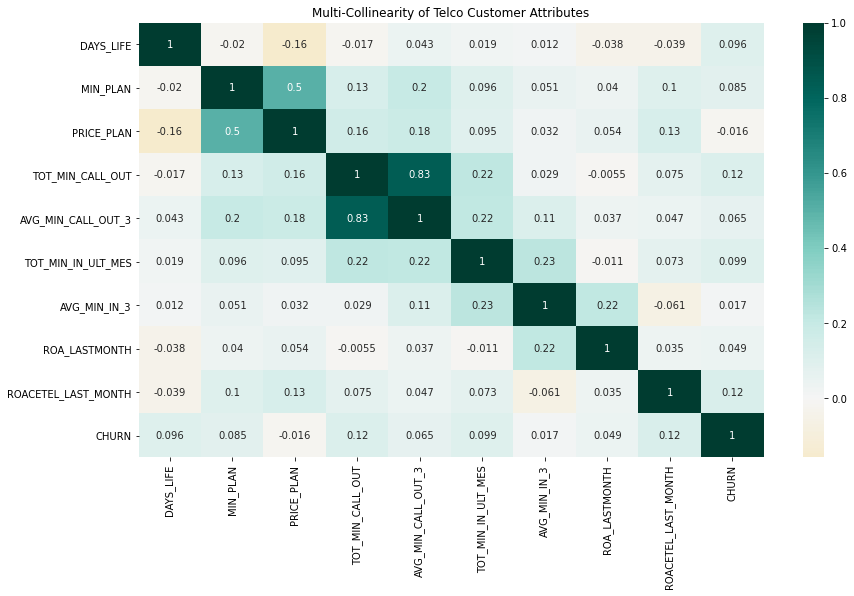

In [25]:
# Heatmap to determine multi-collinearity of non-categorical values
_ = plt.figure(figsize=(14,8))
_ = sns.heatmap(df.corr(), annot=True, center=0, cmap='BrBG')
_ = plt.title('Multi-Collinearity of Telco Customer Attributes')
plt.savefig('Heatmap.png')
plt.show()

In the heatmap above, we see our highest correlation (0.83) is for the average number of outgoing minutes over the last 3 months (AVG_MIN_CALL_OUT_3) and the total number of outgoing minutes (TOT_MIN_CALL_OUT). This correlation should not surprise us because a user's behavior over the last 3 months contributes to their behavior over their total time with the company.

If we want a glimpse into the distribution of locations in the dataset (numerical values for state and city data), we can look at the four cells below.

In [26]:
# The code below allows us to see which numerical values for state data are the most popular in our dataset.
df.STATE_VOICE.value_counts()

 100.0    84447
 8.0      22241
 5.0      22169
 10.0      7690
 9.0       7659
 4.0       6787
 6.0       6301
 7.0       6238
 2.0       5909
 14.0      4093
 1.0       3329
 3.0       2831
 15.0      2186
-1.0       2020
 12.0       910
 11.0       343
Name: STATE_VOICE, dtype: int64

In [27]:
# Despite the state numbers ranging from 1 to 100, we see below that only 16 values are actually utilized here.
len(df.STATE_VOICE.value_counts())

16

In [28]:
# The code below allows us to see which numerical values for city data are the most popular in our dataset.
df.CITY_VOICE.value_counts()

345.0    8084
135.0    6183
318.0    5728
339.0    4182
308.0    4171
         ... 
137.0       1
36.0        1
76.0        1
271.0       1
74.0        1
Name: CITY_VOICE, Length: 339, dtype: int64

In [29]:
# Despite having a maximum value of 346, only 339 numbers in our range are actually utilized.
len(df.CITY_VOICE.value_counts())

339

In [30]:
# Simple ECDF Formula borrowed from DataCamp
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

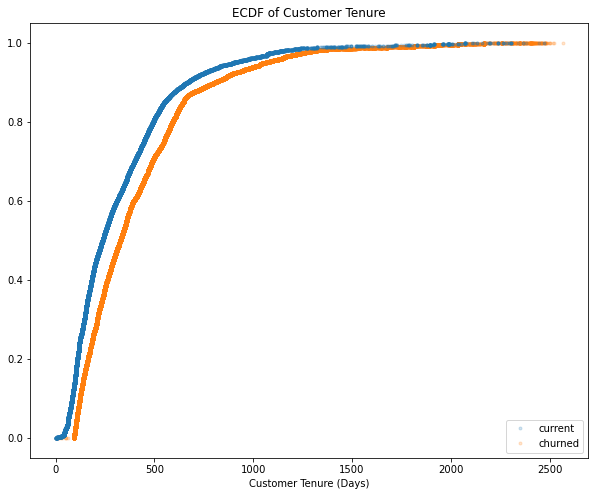

In [31]:
x_current, y_current = ecdf(df['DAYS_LIFE'][df['CHURN'] == 0])
x_churned, y_churned = ecdf(df['DAYS_LIFE'][df['CHURN'] == 1])

_ = plt.figure(figsize=(10,8))
_ = plt.plot(x_current, y_current, marker = '.', alpha=0.2, zorder=2, linestyle='none', label='current')
_ = plt.plot(x_churned, y_churned, marker = '.', alpha=0.2, zorder=1, linestyle='none', label='churned')
_ = plt.legend(loc='lower right')
_ = plt.xlabel('Customer Tenure (Days)')
_ = plt.title('ECDF of Customer Tenure')
plt.savefig('ecdf.png')
plt.show()

Above, we can see that the Cumulative Density Function for current customers is slightly to the left of the CDF for churned customers. The two begin to converge around the 1500 Day mark.

### Churned vs. Current

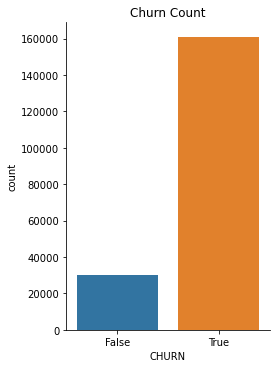

In [32]:
_ = sns.catplot(x="CHURN", kind="count", data=df, height = 5, aspect=0.75)
_ = plt.title('Churn Count')
plt.savefig('Churn Count.png')
plt.show()

From the chart above, we can see that the majority of the customers have churned. We can use the code in the next cell to take a look at those exact numbers. 

In [33]:
df.CHURN.value_counts()

True     160890
False     29884
Name: CHURN, dtype: int64

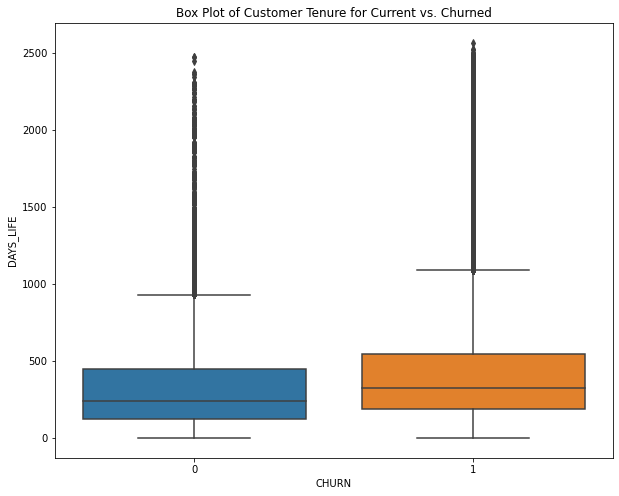

In [34]:
_ = plt.figure(figsize=(10,8))
_ = sns.boxplot(x=df['CHURN'].astype(int), y='DAYS_LIFE', data=df)
_ = plt.title('Box Plot of Customer Tenure for Current vs. Churned')
plt.show()

The plot below is a kernel density/distribution plot. It shows how the shapes of the two groups compare, but the y-axis indicates how values within a single group relate to the rest of the values in that group. In reality, the orange "Churned" subset represents the majority of the company's customers, as we will see in the histogram that follows this distribution plot. This drastic difference in charts is due to class imbalance, meaning there is much more data relating to the churned group of customers than there is relating to the group of current customers.

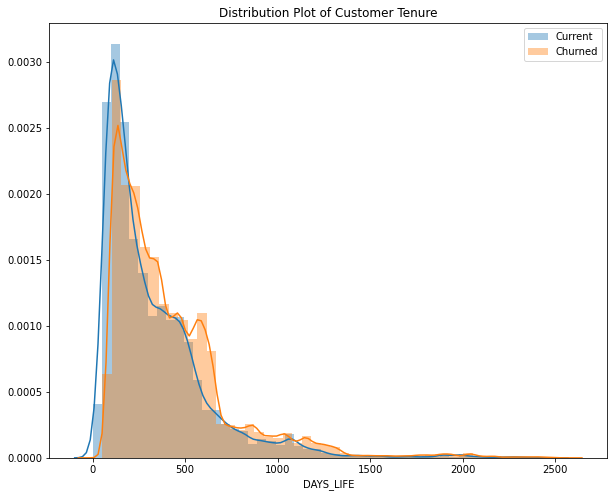

In [35]:
_ = plt.figure(figsize=(10,8))
_ = sns.distplot(df['DAYS_LIFE'].loc[df['CHURN'] == 0], bins=50, label='Current')
_ = sns.distplot(df['DAYS_LIFE'].loc[df['CHURN'] == 1], bins=50, label='Churned')
_ = plt.title('Distribution Plot of Customer Tenure')
plt.legend()
plt.savefig('Distribution Plot of Customer Tenure.png')
plt.show()

In the distribution plot above, we can see that the majority of customers who left actually left within the first 700 or so days. The current customer data exhibits a similar distribution but slightly to the left of the churned subset.

Below is the same data plotted as a histogram to help us visualize just how much of the data relates to customers who have already churned vs. those who haven't yet.

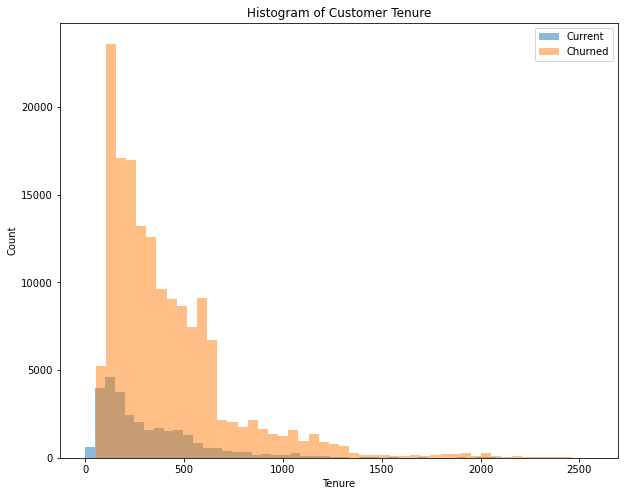

In [36]:
_ = plt.figure(figsize=(10,8))
_ = plt.hist(df['DAYS_LIFE'].loc[df['CHURN'] == 0], bins=50, alpha=0.5, label='Current')
_ = plt.hist(df['DAYS_LIFE'].loc[df['CHURN'] == 1], bins=50, alpha=0.5, label='Churned')
_ = plt.xlabel('Tenure')
_ = plt.ylabel('Count')
_ = plt.title('Histogram of Customer Tenure')
plt.legend()
plt.savefig('Histogram of Customer Tenure.png')
plt.show()

For the plots below, the histogram is displayed on the left with the density plot on the right side.

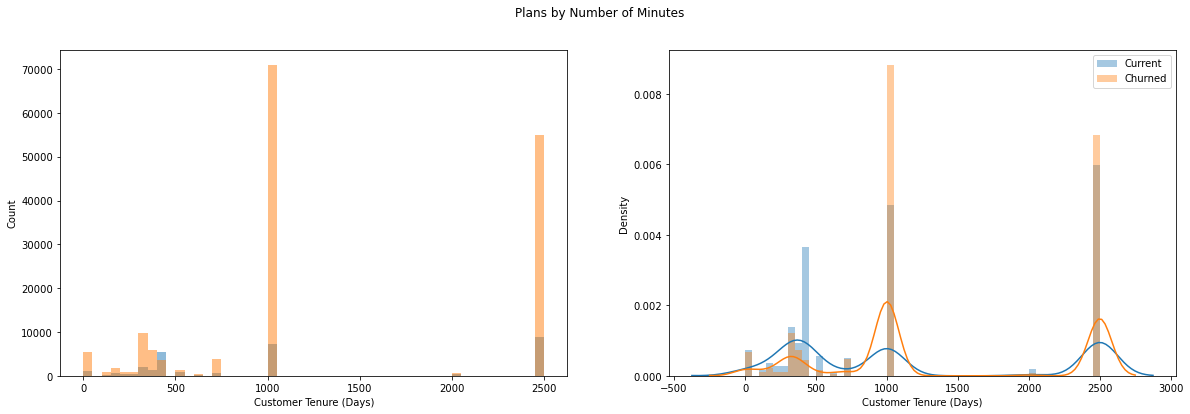

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
_ = fig.suptitle('Plans by Number of Minutes')


_ = ax1.hist(df['MIN_PLAN'].loc[df['CHURN'] == 0], bins=50, alpha=0.5, label='Current')
_ = ax1.hist(df['MIN_PLAN'].loc[df['CHURN'] == 1], bins=50, alpha=0.5, label='Churned')
_ = ax1.set_xlabel('Customer Tenure (Days)')
_ = ax1.set_ylabel('Count')


_ = sns.distplot(df['MIN_PLAN'].loc[df['CHURN'] == 0], bins=50, label='Current', ax=ax2)
_ = sns.distplot(df['MIN_PLAN'].loc[df['CHURN'] == 1], bins=50, label='Churned', ax=ax2)
_ = ax2.set_xlabel('Customer Tenure (Days)')
_ = ax2.set_ylabel('Density')
_ = plt.legend()
plt.show()

In [38]:
data = Counter(df['MIN_PLAN'])
data.most_common(3)  # Returns the highest 3 occurring items

[(1000, 78128), (2500, 63918), (300, 11838)]

We see that the three most common plans overall are for 1000, 2500, and 300 minutes.

/Users/ash/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


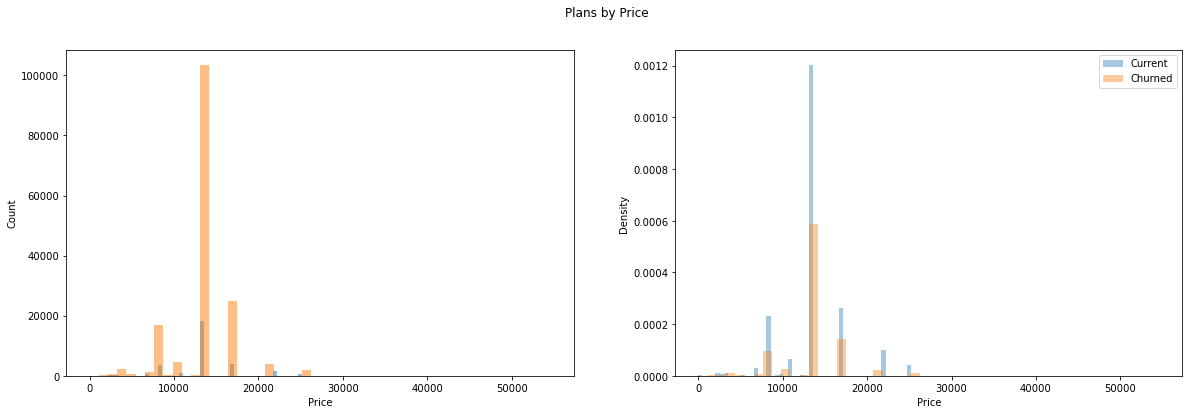

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
_ = fig.suptitle('Plans by Price')


_ = ax1.hist(df['PRICE_PLAN'].loc[df['CHURN'] == 0], bins=50, alpha=0.5, label='Current')
_ = ax1.hist(df['PRICE_PLAN'].loc[df['CHURN'] == 1], bins=50, alpha=0.5, label='Churned')
_ = ax1.set_xlabel('Price')
_ = ax1.set_ylabel('Count')


_ = sns.distplot(df['PRICE_PLAN'].loc[df['CHURN'] == 0], bins=50, label='Current', ax=ax2)
_ = sns.distplot(df['PRICE_PLAN'].loc[df['CHURN'] == 1], bins=50, label='Churned', ax=ax2)
_ = ax2.set_xlabel('Price')
_ = ax2.set_ylabel('Density')
_ = plt.legend()
plt.show()

In [40]:
df['PRICE_PLAN'].sort_values(ascending=False)

13955     54622
61005     42017
86996     42017
8281      33613
170007    33613
          ...  
1532          0
112568        0
120551        0
2475          0
168300        0
Name: PRICE_PLAN, Length: 190774, dtype: int64

In [41]:
data = Counter(df['PRICE_PLAN'])
data.most_common(3)  # Returns the highest 3 occurring items

[(13437, 121250), (16798, 28757), (8395, 20231)]

From the two plots above, we can see that there were several specific plans. Two of the most common overall plans are for 1000 and 2500 minutes. A popular plan for current users appears to be 300.  However, there do not appear to be nearly as many churned users who were on this plan. This could be for a reason such as the customers on this plan liking it and not leaving, or perhaps it was added as an option later. This is where having specifc dates for customer tenure would allow us to see if this option was a later addition in an attempt to reduce churn and if it has been successful thus far. Regarding the price of the plans, we see the majority paid 13,437 in local currency, followed by the next two groups who paid 16,798 and 8395, respectively. Our two plots do not match up exactly, which would lead us to believe that there has been at least one change in the price of plans over the time period. 

We can also create plots of the remaining 6 continuous values in this dataset.

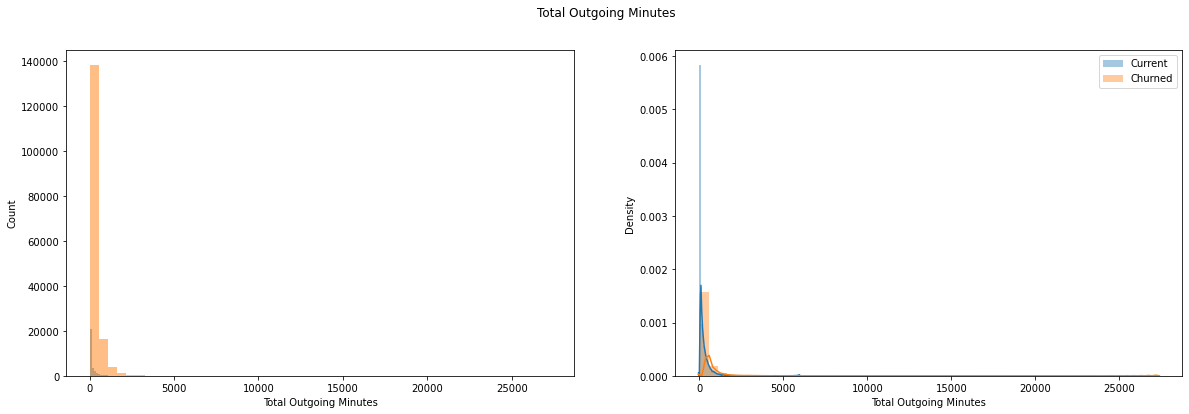

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
_ = fig.suptitle('Total Outgoing Minutes')


_ = ax1.hist(df['TOT_MIN_CALL_OUT'].loc[df['CHURN'] == 0], bins=50, alpha=0.5, label='Current')
_ = ax1.hist(df['TOT_MIN_CALL_OUT'].loc[df['CHURN'] == 1], bins=50, alpha=0.5, label='Churned')
_ = ax1.set_xlabel('Total Outgoing Minutes')
_ = ax1.set_ylabel('Count')


_ = sns.distplot(df['TOT_MIN_CALL_OUT'].loc[df['CHURN'] == 0], bins=50, label='Current', ax=ax2)
_ = sns.distplot(df['TOT_MIN_CALL_OUT'].loc[df['CHURN'] == 1], bins=50, label='Churned', ax=ax2)
_ = ax2.set_xlabel('Total Outgoing Minutes')
_ = ax2.set_ylabel('Density')
_ = plt.legend()
plt.show()

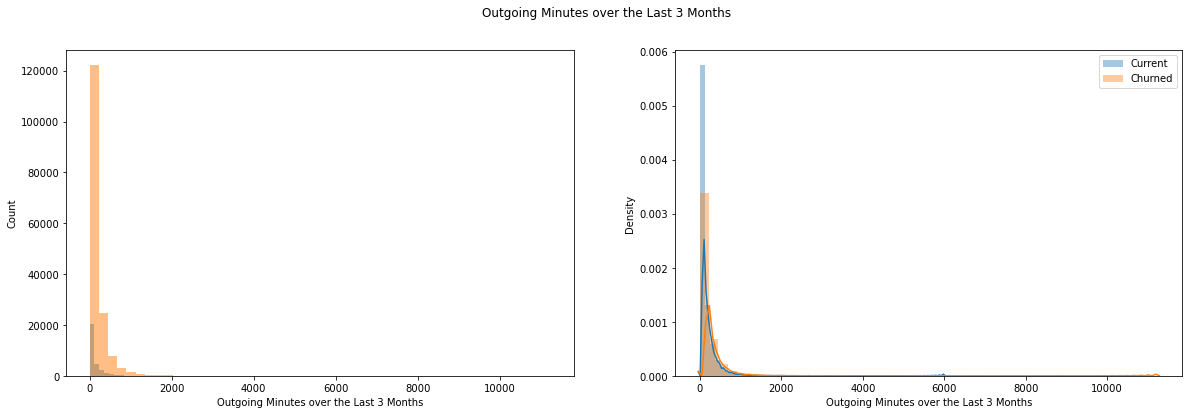

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
_ = fig.suptitle('Outgoing Minutes over the Last 3 Months')


_ = ax1.hist(df['AVG_MIN_CALL_OUT_3'].loc[df['CHURN'] == 0], bins=50, alpha=0.5, label='Current')
_ = ax1.hist(df['AVG_MIN_CALL_OUT_3'].loc[df['CHURN'] == 1], bins=50, alpha=0.5, label='Churned')
_ = ax1.set_xlabel('Outgoing Minutes over the Last 3 Months')
_ = ax1.set_ylabel('Count')


_ = sns.distplot(df['AVG_MIN_CALL_OUT_3'].loc[df['CHURN'] == 0], bins=50, label='Current', ax=ax2)
_ = sns.distplot(df['AVG_MIN_CALL_OUT_3'].loc[df['CHURN'] == 1], bins=50, label='Churned', ax=ax2)
_ = ax2.set_xlabel('Outgoing Minutes over the Last 3 Months')
_ = ax2.set_ylabel('Density')
_ = plt.legend()
plt.show()

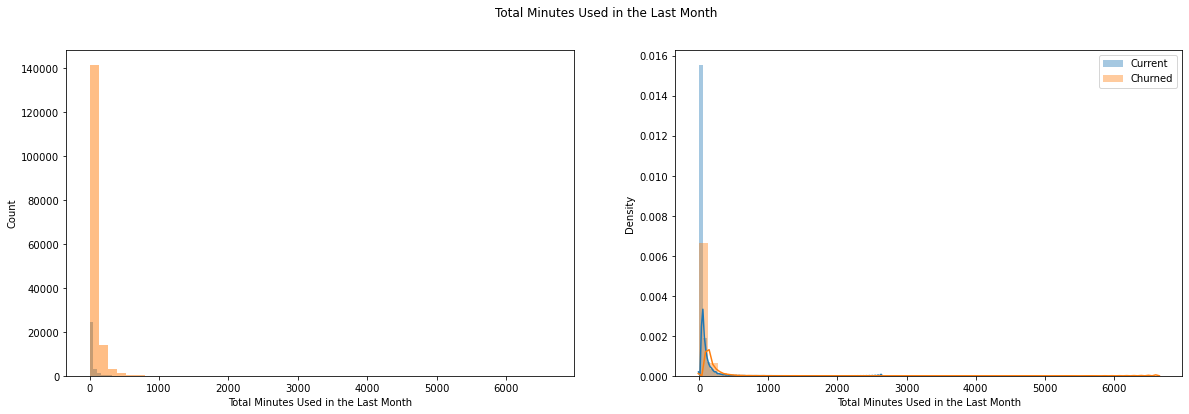

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
_ = fig.suptitle('Total Minutes Used in the Last Month')


_ = ax1.hist(df['TOT_MIN_IN_ULT_MES'].loc[df['CHURN'] == 0], bins=50, alpha=0.5, label='Current')
_ = ax1.hist(df['TOT_MIN_IN_ULT_MES'].loc[df['CHURN'] == 1], bins=50, alpha=0.5, label='Churned')
_ = ax1.set_xlabel('Total Minutes Used in the Last Month')
_ = ax1.set_ylabel('Count')


_ = sns.distplot(df['TOT_MIN_IN_ULT_MES'].loc[df['CHURN'] == 0], bins=50, label='Current', ax=ax2)
_ = sns.distplot(df['TOT_MIN_IN_ULT_MES'].loc[df['CHURN'] == 1], bins=50, label='Churned', ax=ax2)
_ = ax2.set_xlabel('Total Minutes Used in the Last Month')
_ = ax2.set_ylabel('Density')
_ = plt.legend()
plt.show()

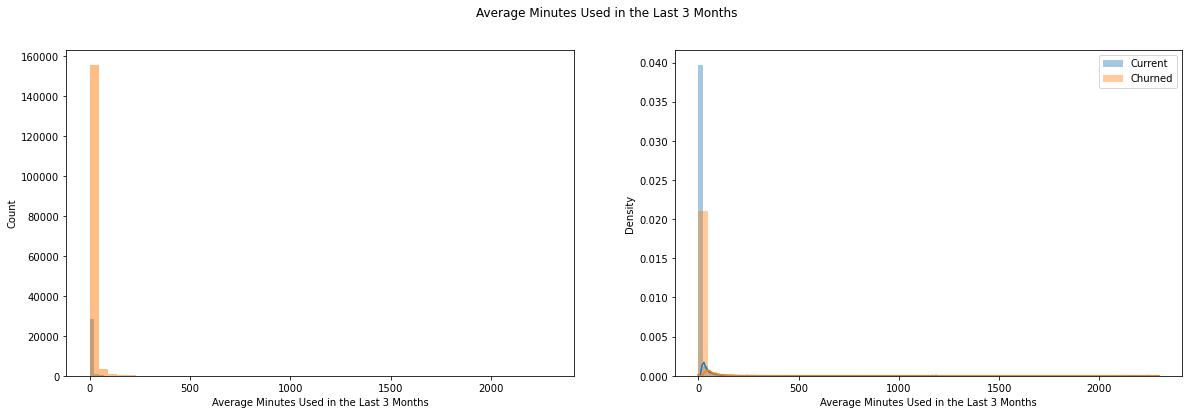

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
_ = fig.suptitle('Average Minutes Used in the Last 3 Months')


_ = ax1.hist(df['AVG_MIN_IN_3'].loc[df['CHURN'] == 0], bins=50, alpha=0.5, label='Current')
_ = ax1.hist(df['AVG_MIN_IN_3'].loc[df['CHURN'] == 1], bins=50, alpha=0.5, label='Churned')
_ = ax1.set_xlabel('Average Minutes Used in the Last 3 Months')
_ = ax1.set_ylabel('Count')


_ = sns.distplot(df['AVG_MIN_IN_3'].loc[df['CHURN'] == 0], bins=50, label='Current', ax=ax2)
_ = sns.distplot(df['AVG_MIN_IN_3'].loc[df['CHURN'] == 1], bins=50, label='Churned', ax=ax2)
_ = ax2.set_xlabel('Average Minutes Used in the Last 3 Months')
_ = ax2.set_ylabel('Density')
_ = plt.legend()
plt.show()

/Users/ash/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


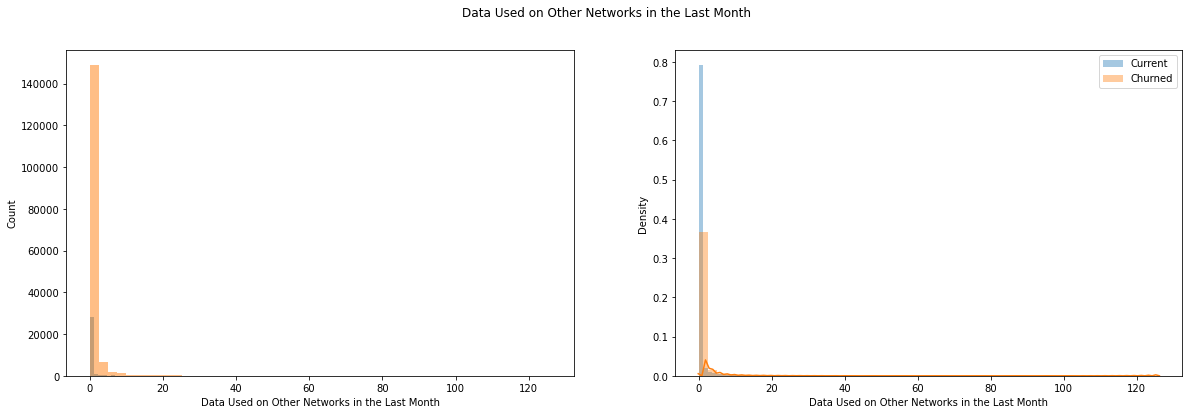

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
_ = fig.suptitle('Data Used on Other Networks in the Last Month')


_ = ax1.hist(df['ROA_LASTMONTH'].loc[df['CHURN'] == 0], bins=50, alpha=0.5, label='Current')
_ = ax1.hist(df['ROA_LASTMONTH'].loc[df['CHURN'] == 1], bins=50, alpha=0.5, label='Churned')
_ = ax1.set_xlabel('Data Used on Other Networks in the Last Month')
_ = ax1.set_ylabel('Count')


_ = sns.distplot(df['ROA_LASTMONTH'].loc[df['CHURN'] == 0], bins=50, label='Current', ax=ax2)
_ = sns.distplot(df['ROA_LASTMONTH'].loc[df['CHURN'] == 1], bins=50, label='Churned', ax=ax2)
_ = ax2.set_xlabel('Data Used on Other Networks in the Last Month')
_ = ax2.set_ylabel('Density')
_ = plt.legend()
plt.show()

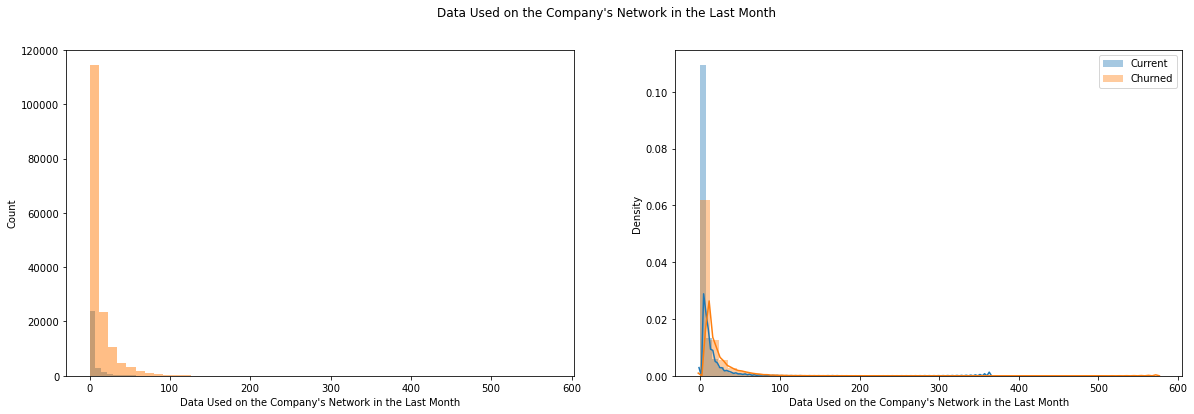

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
_ = fig.suptitle('Data Used on the Company\'s Network in the Last Month')


_ = ax1.hist(df['ROACETEL_LAST_MONTH'].loc[df['CHURN'] == 0], bins=50, alpha=0.5, label='Current')
_ = ax1.hist(df['ROACETEL_LAST_MONTH'].loc[df['CHURN'] == 1], bins=50, alpha=0.5, label='Churned')
_ = ax1.set_xlabel('Data Used on the Company\'s Network in the Last Month')
_ = ax1.set_ylabel('Count')


_ = sns.distplot(df['ROACETEL_LAST_MONTH'].loc[df['CHURN'] == 0], bins=50, label='Current', ax=ax2)
_ = sns.distplot(df['ROACETEL_LAST_MONTH'].loc[df['CHURN'] == 1], bins=50, label='Churned', ax=ax2)
_ = ax2.set_xlabel('Data Used on the Company\'s Network in the Last Month')
_ = ax2.set_ylabel('Density')
_ = plt.legend()
plt.show()

The majority of users fell on the low end of minutes and data usage. We would expect a lot of observations to fall around the 0 mark for data dependent upon the last 1-3 months if so many customers have already churned (and are not using the company's product/services).

Now that we have visualized the breakdown of the two groups a bit and the relationship between observations in a group compared to the rest of the group and observations between the two groups in general, we can separate the churned vs. current customers into two smaller datasets.

In [48]:
# Dataframe of info for all customers who have churned
churned_subset = df.loc[df['CHURN'] == 1]
churned_subset

,CETEL_NUMBER,CNI_CUSTOMER,DAYS_LIFE,DEVICE_TECHNOLOGY,MIN_PLAN,PRICE_PLAN,TOT_MIN_CALL_OUT,AVG_MIN_CALL_OUT_3,TOT_MIN_IN_ULT_MES,AVG_MIN_IN_3,ROA_LASTMONTH,ROACETEL_LAST_MONTH,DEVICE,TEC_ANT_DATA,STATE_DATA,CITY_DATA,TEC_ANT_VOICE,STATE_VOICE,CITY_VOICE,CHURN
3478,56978972101,764519671,599,1,2500,13437,151,66,32,0,0,11,10,4,100,291,4,100,288,True
3479,56964504920,760801925,440,1,150,8395,0,4,0,0,0,0,2,4,100,135,4,100,209,True
3480,56961231750,130809227,644,1,2500,13437,8,4,9,0,0,15,7,3,100,339,3,100,339,True
3481,56948654838,92919099,113,2,1000,8395,164,46,3,0,10,3,13,3,10,18,3,10,18,True
3482,56959838529,109484970,265,1,2500,13437,32,32,53,1,0,34,3,4,4,4,4,4,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170465,56964841170,732136002,106,1,1000,13437,2,0,17,0,0,50,3,4,100,258,4,100,258,True
170466,56966593917,76443692K,236,2,1000,13437,1015,699,115,4,0,35,13,4,9,52,4,9,320,True
170467,56981081498,605060005,1152,1,0,2101,0,0,0,0,0,0,7,0,NaN,NaN,0,NaN,NaN,True
170468,56945988882,605060005,1159,1,0,3358,114,60,0,0,0,1,3,3,8,83,3,8,83,True


In [49]:
churned_subset.describe()

,DAYS_LIFE,MIN_PLAN,PRICE_PLAN,TOT_MIN_CALL_OUT,AVG_MIN_CALL_OUT_3,TOT_MIN_IN_ULT_MES,AVG_MIN_IN_3,ROA_LASTMONTH,ROACETEL_LAST_MONTH
count,160890.000000,160890.000000,160890.000000,160890.000000,160890.000000,160890.000000,160890.000000,160890.000000,160890.000000
mean,415.459929,1370.126484,13397.632799,274.228293,169.116533,59.851408,6.306936,0.804226,11.194456
std,325.746461,863.711102,3278.176646,425.915952,256.117472,104.120056,24.703245,2.814199,17.766570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,186.000000,1000.000000,13437.000000,36.000000,24.000000,7.000000,0.000000,0.000000,1.000000
50%,328.000000,1000.000000,13437.000000,141.000000,88.000000,28.000000,0.000000,0.000000,5.000000
75%,548.000000,2500.000000,13437.000000,350.000000,217.000000,74.000000,3.000000,1.000000,14.000000
max,2567.000000,2500.000000,54622.000000,27308.000000,11241.000000,6644.000000,2298.000000,126.000000,574.000000


In [50]:
# Dataframe of info for all customers who haven't churned
current_subset = df.loc[df['CHURN'] == 0]
current_subset

,CETEL_NUMBER,CNI_CUSTOMER,DAYS_LIFE,DEVICE_TECHNOLOGY,MIN_PLAN,PRICE_PLAN,TOT_MIN_CALL_OUT,AVG_MIN_CALL_OUT_3,TOT_MIN_IN_ULT_MES,AVG_MIN_IN_3,ROA_LASTMONTH,ROACETEL_LAST_MONTH,DEVICE,TEC_ANT_DATA,STATE_DATA,CITY_DATA,TEC_ANT_VOICE,STATE_VOICE,CITY_VOICE,CHURN
0,56991715723,761130129,455,1,200,8395,0,0,0,2,0,0,7,2.5,10,93,2.5,10,93,False
1,56936225196,155259159,180,2,2500,13437,4,145,32,336,1,0,13,3,6,38,3,6,38,False
2,56989789214,143481697,480,1,2500,16798,0,20,4,2,0,0,3,3,5,313,3,4,342,False
3,56990739868,72526880,173,2,2500,16798,197,630,34,6,1,17,13,4,100,268,4,100,268,False
4,56993149265,160008989,317,1,2500,25202,109,66,95,0,0,1,7,4,5,156,4,5,156,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190769,56972771502,8257,42,2,1000,16798,10,1,1,0,0,3,2,4,7,316,4,7,316,False
190770,56978932387,8257,42,1,1000,13437,0,0,0,0,0,0,4,4,100,345,4,100,345,False
190771,56964225103,89130239,1777,2,400,13437,17,24,27,0,1,57,13,4,5,69,4,5,69,False
190772,56983215619,163106485,687,1,400,13437,244,77,156,0,0,3,7,4,6,27,4,6,274,False


In [51]:
current_subset.describe()

,DAYS_LIFE,MIN_PLAN,PRICE_PLAN,TOT_MIN_CALL_OUT,AVG_MIN_CALL_OUT_3,TOT_MIN_IN_ULT_MES,AVG_MIN_IN_3,ROA_LASTMONTH,ROACETEL_LAST_MONTH
count,29884.000000,29884.000000,29884.000000,29884.000000,29884.000000,29884.000000,29884.000000,29884.000000,29884.000000
mean,329.948300,1165.182037,13545.202081,143.609423,124.324388,32.429226,5.156371,0.443582,5.517033
std,294.107815,927.206345,3742.096829,293.349230,213.563044,79.312879,22.841977,1.965127,12.553521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124.000000,400.000000,13437.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,238.000000,1000.000000,13437.000000,25.000000,51.000000,5.000000,0.000000,0.000000,1.000000
75%,447.000000,2500.000000,13437.000000,166.000000,156.000000,34.000000,2.000000,0.000000,6.000000
max,2472.000000,2500.000000,25210.000000,5948.000000,5978.000000,2641.000000,1194.000000,59.000000,364.000000


In [52]:
# Here we see that only about 15% of customers are currently with the company
len(current_subset) / (len(churned_subset) + len(current_subset))

0.1566460838479038

In [53]:
np.mean(current_subset['DAYS_LIFE'])

329.94830009369565

In [54]:
np.mean(churned_subset['DAYS_LIFE'])

415.45992914413574

As perhaps can be expected, the average tenure of a churned customer is higher than that of a current customer--nearly 86 days higher. Many of the customers who have not churned are still fairly new. We can especially see this by comparing the 50th percentile of both groups for the "DAYS_LIFE" feature.

We can also perform a t-Test to determine whether or not these are two groups with fundamentally different characteristics. Our null hypothesis is that there is no noticeable difference in features between the churned and current groups. Our alternative hypothesis is that there is a significant difference between the two groups--aside from the simple matter of whether or not they are still with the company.

In [55]:
ttest_ind(df[df.CHURN == 0].DAYS_LIFE, df[df.CHURN == 1].DAYS_LIFE)

Ttest_indResult(statistic=-42.291112483601175, pvalue=0.0)

Based on the low p-value results of the test above, we reject the null hypothesis.

Below, we can plot the Kaplan-Meier Survival Curve to visualize the probability that a customer stays with the company for a certain number of days.

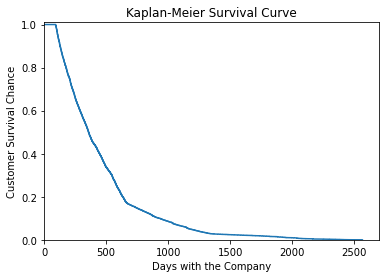

In [56]:
from sksurv.nonparametric import kaplan_meier_estimator


x, y = kaplan_meier_estimator(df.CHURN, df.DAYS_LIFE)
_ = plt.step(x, y, where="post")
_ = plt.xlim(0, 2700)
_ = plt.ylim(0, 1.01)
_ = plt.xlabel('Days with the Company')
_ = plt.ylabel('Customer Survival Chance')
_ = plt.title('Kaplan-Meier Survival Curve')
plt.savefig('Kaplan-Meier Survival Curve.png')
plt.show()